In [1]:
import pandas as pd
import numpy as np 
from prophet import Prophet
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Loading Data
data = pd.read_csv('D:\Master_Folder\Data Science Course\Projects\StockMarket\stock_data\SUZLON.NS_2023-01-01_to_2024-11-21_ML.csv')
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

df = data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      414 non-null    datetime64[ns]
 1   y       414 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.6 KB


In [4]:
# Split data into train and test
train_size = int(len(df) * 0.7)
train = df[:train_size]
test = df[train_size:]

In [5]:
print(f"Train data: {len(train)}, test data: {len(test)}")

Train data: 289, test data: 125


In [6]:
model = Prophet(yearly_seasonality=True, daily_seasonality=True, weekly_seasonality=True)

In [7]:
print("Fitting Prpphet model...")
model.fit(train)

00:55:19 - cmdstanpy - INFO - Chain [1] start processing


Fitting Prpphet model...


00:55:19 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
# Create future dataframe for forcasting
test_future = test[['ds']]
forcast = model.predict(test_future)

In [9]:
test_future.head()

,ds
289,2024-05-22
290,2024-05-23
291,2024-05-24
292,2024-05-27
293,2024-05-28


In [10]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-05-22,47.210434,40.765033,43.549969,47.210434,47.210434,-4.932367,-4.932367,-4.932367,1.793841,...,-0.063914,-0.063914,-0.063914,-6.662294,-6.662294,-6.662294,0.0,0.0,0.0,42.278067
1,2024-05-23,47.307979,41.415561,44.433828,47.307979,47.307979,-4.502150,-4.502150,-4.502150,1.793841,...,0.243687,0.243687,0.243687,-6.539678,-6.539678,-6.539678,0.0,0.0,0.0,42.805829
2,2024-05-24,47.405525,41.793765,44.538020,47.405444,47.405546,-4.281420,-4.281420,-4.281420,1.793841,...,0.329264,0.329264,0.329264,-6.404525,-6.404525,-6.404525,0.0,0.0,0.0,43.124105
3,2024-05-27,47.698160,42.156382,45.007521,47.697736,47.698484,-4.055352,-4.055352,-4.055352,1.793841,...,0.089698,0.089698,0.089698,-5.938891,-5.938891,-5.938891,0.0,0.0,0.0,43.642808
4,2024-05-28,47.795706,42.199352,45.075431,47.794801,47.796361,-4.126104,-4.126104,-4.126104,1.793841,...,-0.150275,-0.150275,-0.150275,-5.769670,-5.769670,-5.769670,0.0,0.0,0.0,43.669602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2024-11-12,64.183307,72.103618,74.916242,63.874922,64.489200,9.310668,9.310668,9.310668,1.793841,...,-0.150275,-0.150275,-0.150275,7.667102,7.667102,7.667102,0.0,0.0,0.0,73.493975
121,2024-11-13,64.280852,72.532715,75.362026,63.968162,64.590740,9.658103,9.658103,9.658103,1.793841,...,-0.063914,-0.063914,-0.063914,7.928177,7.928177,7.928177,0.0,0.0,0.0,73.938956
122,2024-11-14,64.378398,73.118799,76.041539,64.059968,64.692090,10.200732,10.200732,10.200732,1.793841,...,0.243687,0.243687,0.243687,8.163204,8.163204,8.163204,0.0,0.0,0.0,74.579130
123,2024-11-18,64.768579,74.007810,77.011077,64.444411,65.086092,10.683981,10.683981,10.683981,1.793841,...,0.089698,0.089698,0.089698,8.800443,8.800443,8.800443,0.0,0.0,0.0,75.452560


In [11]:
forecast_test = forcast[['ds', 'yhat']].set_index('ds')

In [12]:
test

,ds,y
289,2024-05-22,46.00
290,2024-05-23,48.30
291,2024-05-24,45.95
292,2024-05-27,45.20
293,2024-05-28,43.95
...,...,...
409,2024-11-12,59.39
410,2024-11-13,54.03
411,2024-11-14,56.73
412,2024-11-18,59.26


In [13]:
forecast_test

,yhat
ds,
2024-05-22,42.278067
2024-05-23,42.805829
2024-05-24,43.124105
2024-05-27,43.642808
2024-05-28,43.669602
...,...
2024-11-12,73.493975
2024-11-13,73.938956
2024-11-14,74.579130


In [14]:
# Evaluate performance
mse = mean_squared_error(test['y'], forecast_test['yhat'])
mae = mean_absolute_error(test['y'], forecast_test['yhat'])
r2 = r2_score(test['y'], forecast_test['yhat'])
mape = (abs((test['y'] - forecast_test['yhat']) / test['y']).mean()) * 100

In [15]:
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R2 score: {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Squared Error (MSE): 188.0994
Mean Absolute Error (MAE): 10.9248
R2 score: -0.2991616367546761
Mean Absolute Percentage Error (MAPE): nan%


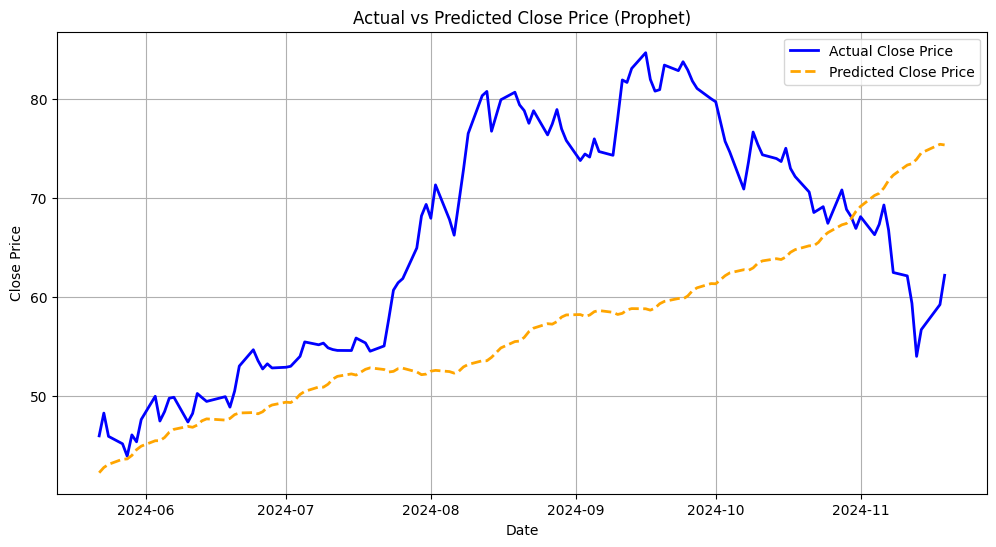

In [16]:
# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(test['ds'], test['y'], label="Actual Close Price", color='blue', linewidth=2)
plt.plot(forecast_test.index, forecast_test['yhat'], label="Predicted Close Price", color='orange', linestyle='dashed', linewidth=2)
plt.title("Actual vs Predicted Close Price (Prophet)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()